Data is from https://www.kaggle.com/datasets/PromptCloudHQ/taylor-swift-song-lyrics-from-all-the-albums/

About Dataset
Context
This data set was created by PromptCloud (a Data-as-a-Service provider), using the API exposed by Genius.com.

Content
It has the following data fields:

album name
track title
track number
lyric text
line number of the lyric in the track
year of release of the album

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string

In [19]:
df = pd.read_csv('../data/taylor_swift_lyrics.csv', encoding = "latin1")
df

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006
...,...,...,...,...,...,...,...
4857,Taylor Swift,reputation,New Year's Day,15,"(Hold on to the memories, they will hold on to...",43,2017
4858,Taylor Swift,reputation,New Year's Day,15,Please don't ever become a stranger,44,2017
4859,Taylor Swift,reputation,New Year's Day,15,"(Hold on to the memories, they will hold on to...",45,2017
4860,Taylor Swift,reputation,New Year's Day,15,Whose laugh I could recognize anywhere,46,2017


In [20]:
df.describe()

,track_n,line,year
count,4862.000000,4862.000000,4862.000000
mean,8.216989,28.426573,2011.882764
std,4.696379,18.343649,3.571447
min,1.000000,1.000000,2006.000000
25%,4.000000,13.000000,2010.000000
50%,8.000000,26.000000,2012.000000
75%,12.000000,41.000000,2014.000000
max,19.000000,101.000000,2017.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4862 entries, 0 to 4861
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       4862 non-null   object
 1   album        4862 non-null   object
 2   track_title  4862 non-null   object
 3   track_n      4862 non-null   int64 
 4   lyric        4862 non-null   object
 5   line         4862 non-null   int64 
 6   year         4862 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 266.0+ KB


In [22]:
album_info = df.groupby(['album', 'year'])['track_n'].nunique().reset_index()
album_info.rename(columns={'track_n': 'number_of_tracks'}, inplace=True)
sorted_album_info = album_info.sort_values(by='year')
sorted_album_info



,album,year,number_of_tracks
4,Taylor Swift,2006,14
1,Fearless,2008,13
3,Speak Now,2010,17
2,Red,2012,19
0,1989,2014,16
5,reputation,2017,15


In [23]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", 
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", 
                       "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                       "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                       "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                       "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                       "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                       "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                       "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", 
                       "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                       "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                       "so's": "so as", "this's": "this is","that'd": "that would", 
                       "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                       "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is",
                       "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
                       "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", 
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                       "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                       "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                       "you'll've": "you will have", "you're": "you are", "you've": "you have" ,
                       "Isn't":"is not", "\u200b":"", "It's": "it is","I'm": "I am","don't":"do not","did't":"did not","ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                       "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                       "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is", "that's": "that is" , "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is",
                       "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
                       "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [24]:
import string

# Create a translation table that maps punctuation to None, except apostrophes
punctuation_except_apostrophe = string.punctuation.replace("'", "")
translation_table = str.maketrans("", "", punctuation_except_apostrophe)

df['lyric_clean'] = df['lyric'].str.lower()

# Apply the translation to each lyric
df['lyric_clean'] = df['lyric_clean'].apply(lambda x: x.translate(translation_table))

for contraction, replacement in contractions.items():
    df['lyric_clean'] = df['lyric_clean'].str.replace(contraction, replacement, regex=False)

df


,artist,album,track_title,track_n,lyric,line,year,lyric_clean
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said the way my blue eyes shined
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put those georgia stars to shame that night
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,i said that is a lie
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just a boy in a chevy truck
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,that had a tendency of gettin' stuck
...,...,...,...,...,...,...,...,...
4857,Taylor Swift,reputation,New Year's Day,15,"(Hold on to the memories, they will hold on to...",43,2017,hold on to the memories they will hold on to you
4858,Taylor Swift,reputation,New Year's Day,15,Please don't ever become a stranger,44,2017,please do not ever become a stranger
4859,Taylor Swift,reputation,New Year's Day,15,"(Hold on to the memories, they will hold on to...",45,2017,hold on to the memories they will hold on to you
4860,Taylor Swift,reputation,New Year's Day,15,Whose laugh I could recognize anywhere,46,2017,whose laugh i could recognize anywhere


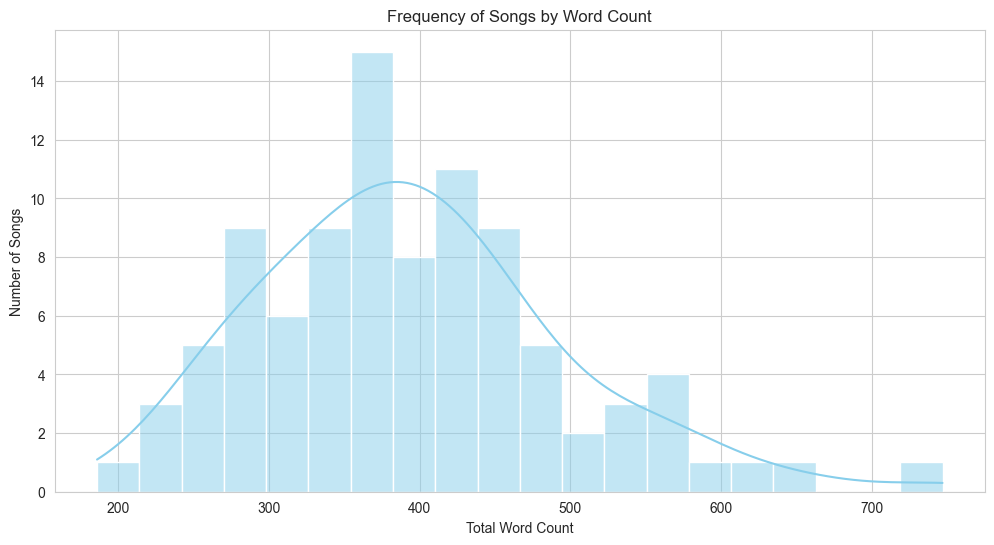

In [25]:
# Calculating word count distribution by song

df['word_count'] = df['lyric_clean'].apply(lambda x: len(x.split()) if x is not None else 0)

# Aggregating word count by song
word_count_distribution = df.groupby(['album', 'track_title'])['word_count'].sum().reset_index()

# Renaming columns for clarity
word_count_distribution.rename(columns={'word_count': 'total_word_count'}, inplace=True)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(word_count_distribution['total_word_count'], bins=20, kde=True, color='skyblue')
plt.title('Frequency of Songs by Word Count')
plt.xlabel('Total Word Count')
plt.ylabel('Number of Songs')
plt.show()




In [26]:
repetitive_rows = df['lyric_clean'].value_counts()
repetitive_rows = repetitive_rows[repetitive_rows > 1]

repetitive_rows

lyric_clean
welcome to new york                    27
all you had to do was stay             15
look what you just made me do          13
oh oh                                  13
ey ey ey ey ey                         12
                                       ..
i can feel the flames on my skin        2
gary lightbody                          2
follow you around                       2
he is so bad but he does it so well     2
he is so tall and handsome as hell      2
Name: count, Length: 777, dtype: int64

I'm going to drop all duplicates

In [27]:
df_deduplicated = df.drop_duplicates(subset='lyric')

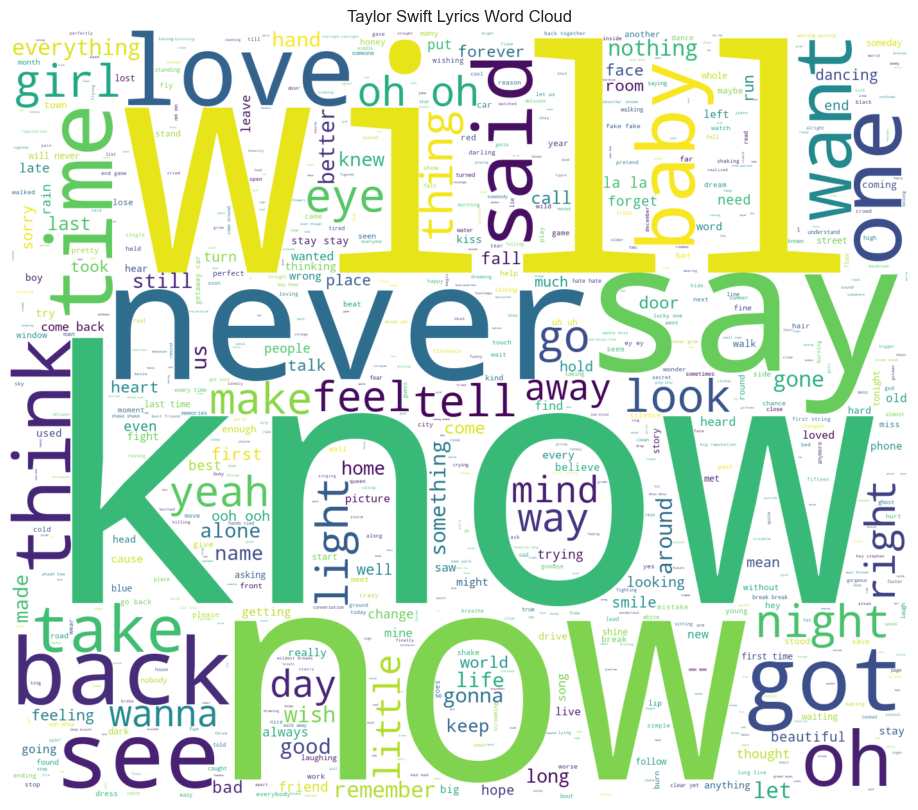

In [28]:
# Generating a word cloud from the 'lyric' column of the dataset
lyrics_text = " ".join(lyric for lyric in df_deduplicated['lyric_clean'] if not pd.isnull(lyric))

# Creating the WordCloud object
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    max_words=10000,
    width=1400,
    height=1200
).generate(lyrics_text)

# Plotting the word cloud
plt.subplots(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Taylor Swift Lyrics Word Cloud')
plt.axis('off')
plt.show()


In [29]:
lyrics_text = ' '.join(df_deduplicated['lyric_clean'].dropna())

# Split the text into words
words = lyrics_text.split()

# Filter out the stopwords
filtered_words = [word for word in words if word.lower() not in STOPWORDS]

# Counting the frequency of the remaining words
word_frequencies = Counter(filtered_words)

# Get the most common words
most_common_words = word_frequencies.most_common(10)
most_common_words

[('know', 178),
 ('will', 155),
 ('oh', 144),
 ('now', 131),
 ('never', 123),
 ('back', 121),
 ('time', 108),
 ('say', 95),
 ('love', 91),
 ('see', 86)]

In [33]:
df_deduplicated[['lyric_clean']].to_parquet("../data/cleaned.parquet", index=False)